In [1]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [2]:
# Listing all the sub-directories in the directory 'data'
os.listdir('data')

['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

In [3]:
# Loading the data
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1803 files belonging to 7 classes.


In [4]:
# Scaling the data
data = data.map(lambda x, y: (x / 255, y))

In [5]:
# Getting an iterator for accessing the data
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

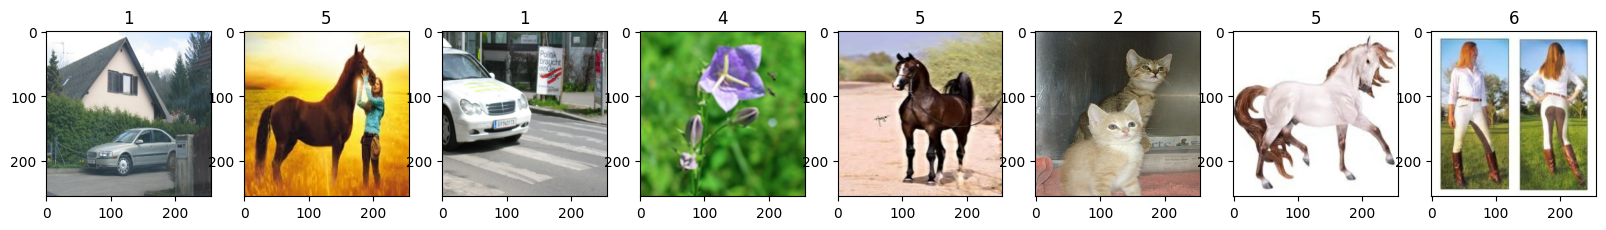

In [6]:
# Plotting some images in a batch
fig, ax = plt.subplots(ncols=8, figsize=(20, 20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [7]:
# Determining the size for spliting the data
data_size = len(data)
train_size = round(data_size * 0.7)
val_size = round(data_size * 0.2)
test_size = round(data_size * 0.1)

print(data_size)
print(train_size, val_size, test_size)

57
40 11 6


In [8]:
# Spliting the data
train = data.take(train_size)
validation = data.skip(train_size).take(val_size)
test = data.skip((train_size + val_size)).take(test_size)

In [9]:
# Importing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [10]:
# Building the model
model = Sequential()

In [11]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

C:\Users\saha0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Adjusting learning rate and including learning rate scheduler
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

In [17]:
# Summarizing the whole model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    58,982,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,080,647 (225.37 MB)

 Trainable params: 59,080,199 (225.37 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
logdir = 'logs'
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [18]:
# Fitting the model
history = model.fit(train, epochs=40, validation_data=validation, callbacks=[early_stopping, checkpoint])

Epoch 1/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.3578 - loss: 18.3902 - val_accuracy: 0.2244 - val_loss: 23.3267
Epoch 2/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.5699 - loss: 12.3837 - val_accuracy: 0.2330 - val_loss: 32.7420
Epoch 3/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.5872 - loss: 11.6746 - val_accuracy: 0.2216 - val_loss: 37.2573
Epoch 4/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.6677 - loss: 11.0248 - val_accuracy: 0.2244 - val_loss: 35.6201
Epoch 5/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.7137 - loss: 10.3982 - val_accuracy: 0.2500 - val_loss: 30.0371
Epoch 6/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.7130 - loss: 9.9335 - val_accuracy: 0.2642 - val_loss: 29.1088
Epoch 7/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.7465 - loss: 9.4426 - val_accuracy: 0.2273 - val_loss: 27.7401
Epoch 8/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.8250 - loss: 8.8893 - val_accuracy: 0.2699

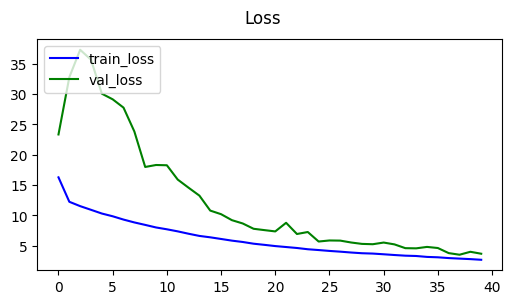

In [19]:
# Plotting the loss of the model
fig = plt.figure(figsize=(6, 3))
plt.plot(history.history['loss'], color='blue', label='train_loss')
plt.plot(history.history['val_loss'], color='green', label='val_loss')
fig.suptitle('Loss')
plt.legend(loc='upper left')
plt.show()

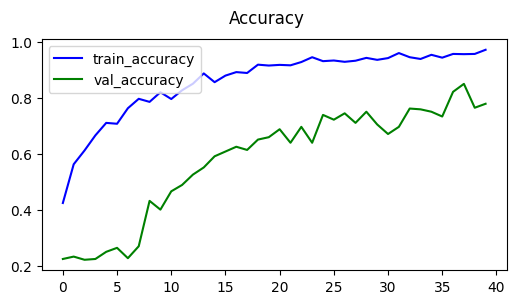

In [20]:
# Plotting the accuracy of the model
fig = plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'], color='blue', label='train_accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [21]:
from tensorflow.keras.metrics import Precision, Recall, Accuracy

In [22]:
precision = Precision()
recall = Recall()
accuracy = Accuracy()

In [23]:
# Getting precision, recall and accuracy of the model
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred = model.predict(X)

    y_pred = tf.argmax(y_pred, axis=1)
    y = tf.cast(y, tf.int64)
    
    precision.update_state(y, y_pred)
    recall.update_state(y, y_pred)
    accuracy.update_state(y, y_pred)

precision_result = precision.result().numpy()
recall_result = recall.result().numpy()
accuracy_result = accuracy.result().numpy()

print(f'Precision: {precision_result}')
print(f'Recall: {recall_result}')
print(f'Accuracy: {accuracy_result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Precision: 0.9577465057373047
Recall: 0.9714285731315613
Accuracy: 0.8181818127632141
